# U.S. Medical Insurance Costs

# **Group Project: U.S. Medical Insurance Costs**

This portfolio project, part of the Codecademy Data Science Career Path, focuses on analyzing a dataset related to medical insurance costs in the United States.

This portfolio project can be found in the followin courses or paths: **Data Science Career Path**

**Project Title:** Group Project: U.S. Medical Insurance Costs

**Organization Name:** CodeCademy

**Problema Description:** In this project, we'll use Python fundamentals to investigate a CSV file containing medical insurance costs. The objective is to analyze the attributes within the insurance.csv file to better understand the patient information and uncover potential use cases for the dataset.


# **Import Library**

The line below lists the libraries that will be used in the project.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

Next, we'll load the data into a Pandas DataFrame using the read_csv() function. We'll provide the path to the CSV file and specify the delimiter used. To get a preview of the data, we'll use the head() method to display the first few rows of the DataFrame.

In [5]:
# code for GitHub
# code for colab

data = pd.read_csv('insurance.csv', delimiter=',')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**insurance.csv** contains the following columns:
age: the age of the individual, in years

*   **sex:** the gender of the individual, either "male" or "female";
*   **bmi:** the body mass index (BMI) of the individual, calculated as weight (in kg) divided by height (in meters) squared;
*   **children:** the number of children the individual has;
*   **smoker:** whether the individual is a smoker or not, either "yes" or "no";
*   **region:** the region where the individual is from, either "northeast", "northwest", "southeast", or "southwest";
*   **charges:** the amount charged by the insurance company for each individual

**The first few rows of the dataset provide a glimpse of the data and its variables, allowing us to see the range of values for each variable, as well as any potential patterns or outliers.**

# **Exploratory Data Analysis: Data Visualization**

The age of the insured follows a discrete uniform distribution, with an outlier in the 20-year age range.

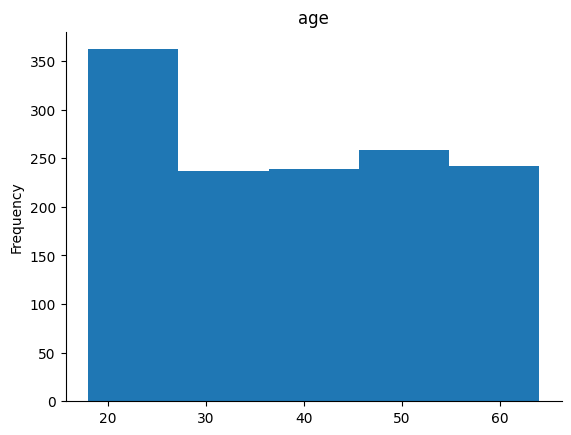

In [30]:
# @title age

from matplotlib import pyplot as plt
data['age'].plot(kind='hist', bins=5, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

The BMI index follows a Gaussian distribution, with its peak occurring in the 30-year age range.

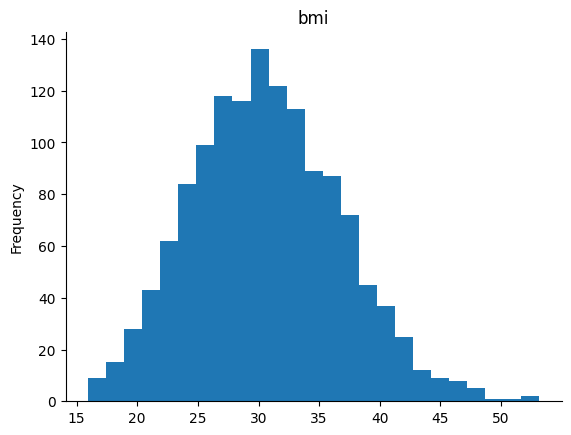

In [36]:
# @title bmi

from matplotlib import pyplot as plt
data['bmi'].plot(kind='hist', bins=25, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

The distribution of the number of children follows a Poisson distribution, with an average close to 0 children.

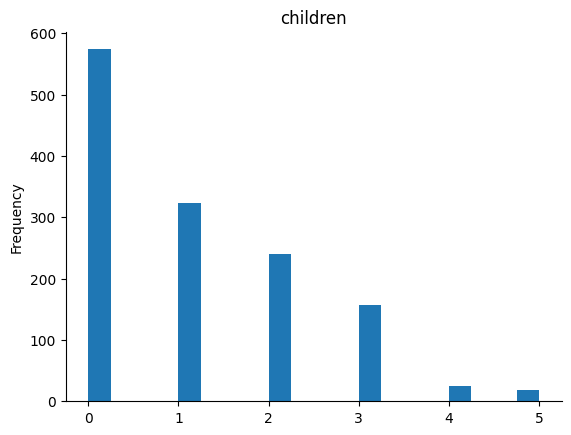

In [24]:
# @title children

from matplotlib import pyplot as plt
data['children'].plot(kind='hist', bins=20, title='children')
plt.gca().spines[['top', 'right',]].set_visible(False)

A numeric variable representing the medical costs billed (charges) by the insurance company follows an exponential distribution, with an average below $5000.

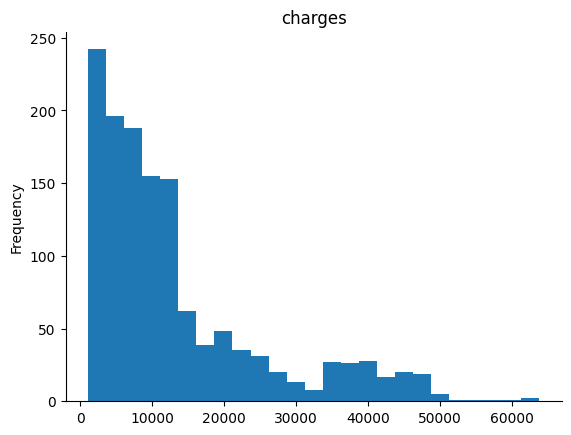

In [40]:
# @title charges

from matplotlib import pyplot as plt
data['charges'].plot(kind='hist', bins=25, title='charges')
plt.gca().spines[['top', 'right',]].set_visible(False)


In percentage terms, the discrete uniform distribution representing the sex of the insured shows a slight predominance of males.

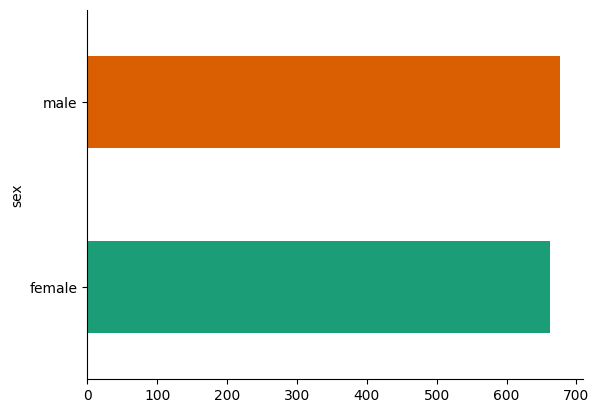

In [22]:
# @title sex

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Smokers follow a binomial distribution, with the largest proportion found among non-smokers.

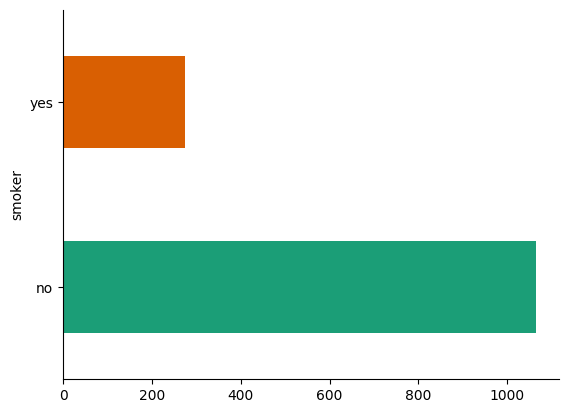

In [21]:
# @title smoker

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('smoker').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The regions follow a discrete uniform distribution, with a slight predominance in the Southeast region.

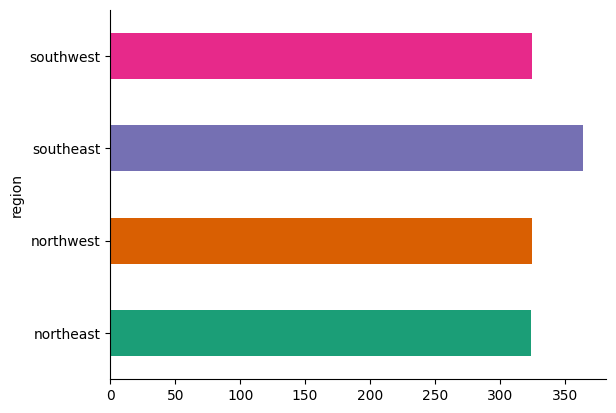

In [20]:
# @title region

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

It is not possible to assert a relationship between the BMI and age variables of individuals.

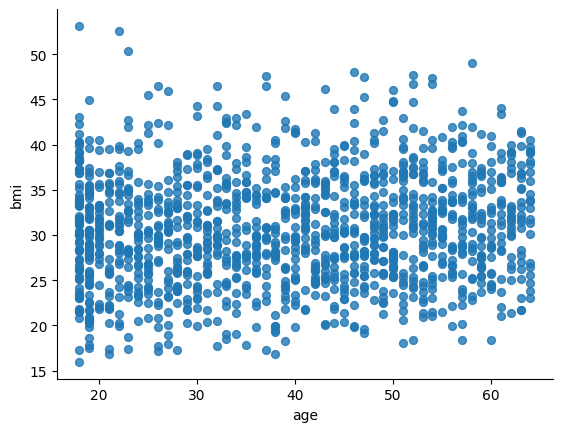

In [19]:
# @title age vs bmi

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='age', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

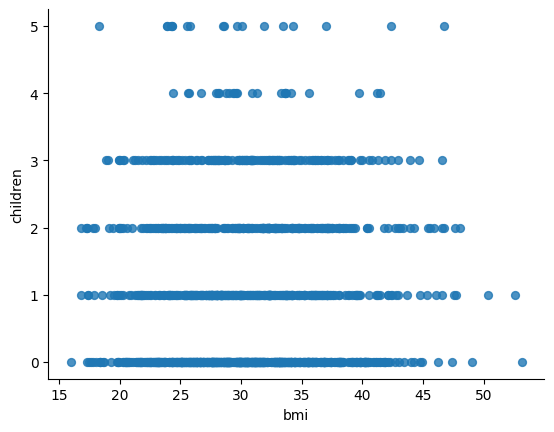

In [18]:
# @title bmi vs children

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='bmi', y='children', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

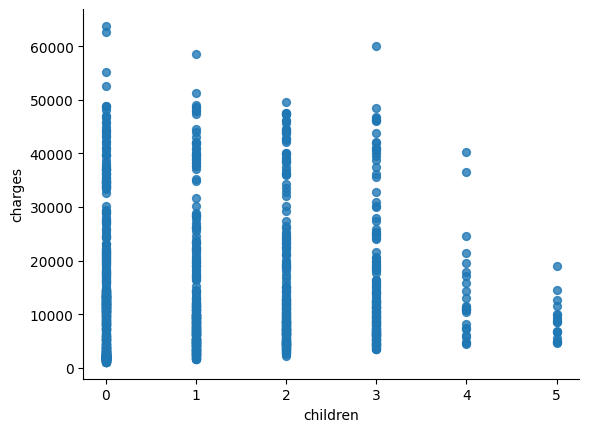

In [17]:
# @title children vs charges

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='children', y='charges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

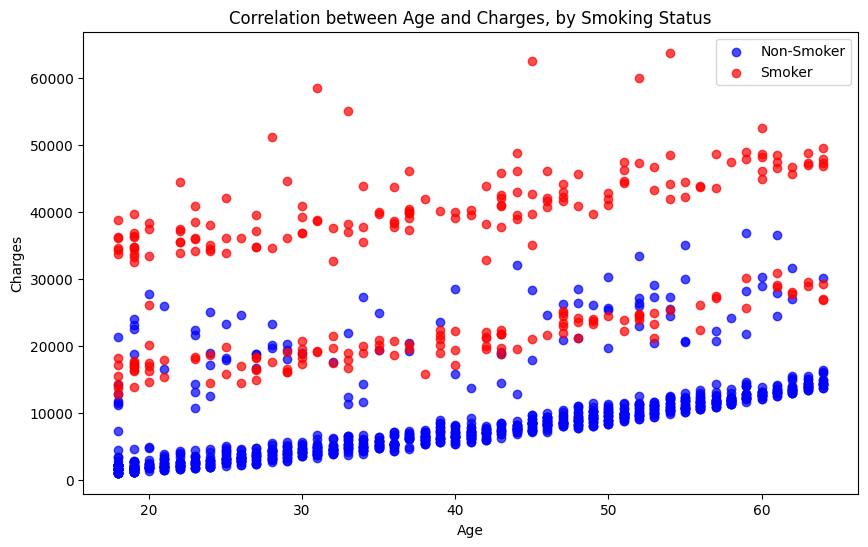

In [16]:
# @title Correlation between Age and Charges, by Smoking Status

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
age = data['age']
charges = data['charges']
smoker = data['smoker']

plt.figure(figsize=(10, 6))
plt.scatter(age[smoker == 'no'], charges[smoker == 'no'], color='blue', label='Non-Smoker', alpha=0.7)
plt.scatter(age[smoker == 'yes'], charges[smoker == 'yes'], color='red', label='Smoker', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Correlation between Age and Charges, by Smoking Status')
_ = plt.legend()

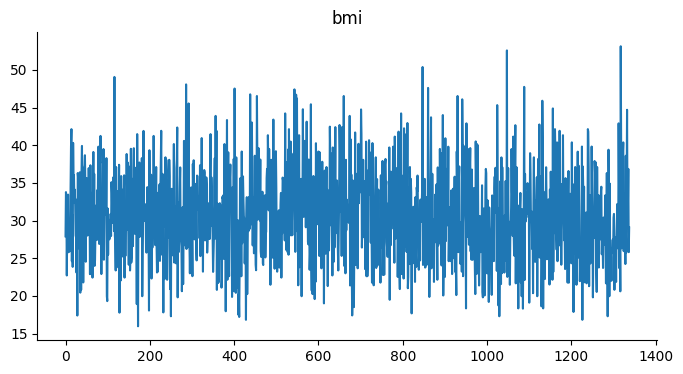

In [15]:
# @title bmi

from matplotlib import pyplot as plt
data['bmi'].plot(kind='line', figsize=(8, 4), title='bmi')
plt.gca().spines[['top', 'right']].set_visible(False)

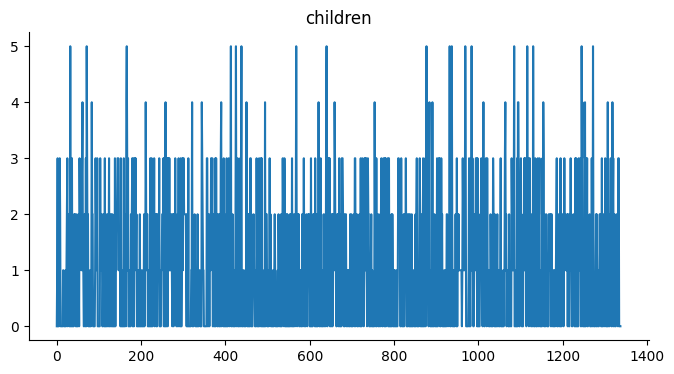

In [14]:
# @title children

from matplotlib import pyplot as plt
data['children'].plot(kind='line', figsize=(8, 4), title='children')
plt.gca().spines[['top', 'right']].set_visible(False)

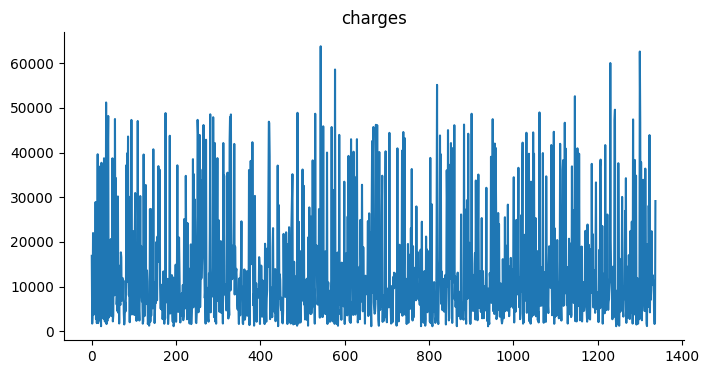

In [13]:
# @title charges

from matplotlib import pyplot as plt
data['charges'].plot(kind='line', figsize=(8, 4), title='charges')
plt.gca().spines[['top', 'right']].set_visible(False)

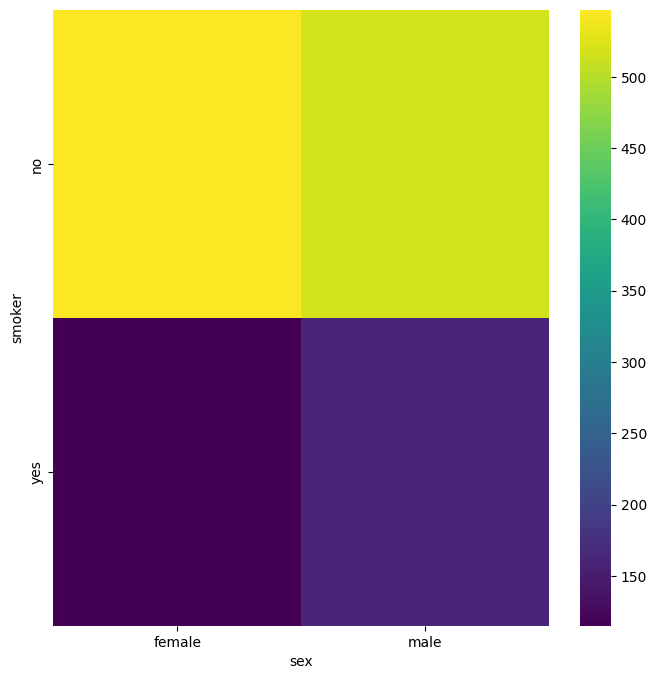

In [12]:
# @title sex vs smoker

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['smoker'].value_counts()
    for x_label, grp in data.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('smoker')

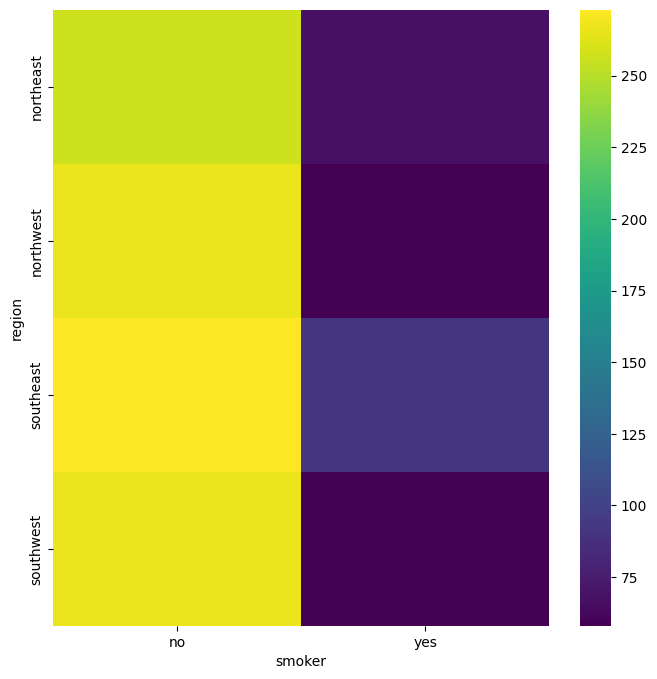

In [11]:
# @title smoker vs region

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['region'].value_counts()
    for x_label, grp in data.groupby('smoker')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('smoker')
_ = plt.ylabel('region')

<ipython-input-10-bd6c3826e1a0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='age', y='sex', inner='box', palette='Dark2')


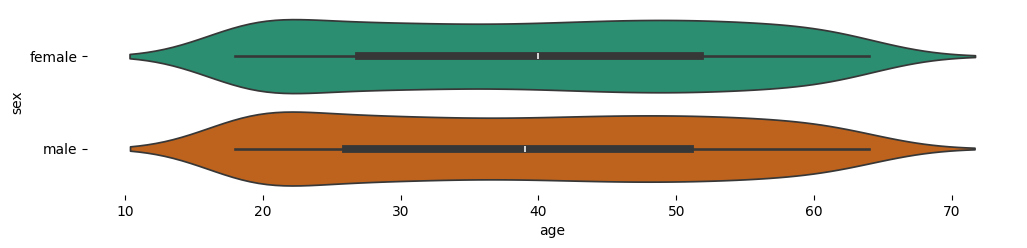

In [10]:
# @title sex vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='age', y='sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-9-38be359453dd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='age', y='smoker', inner='box', palette='Dark2')


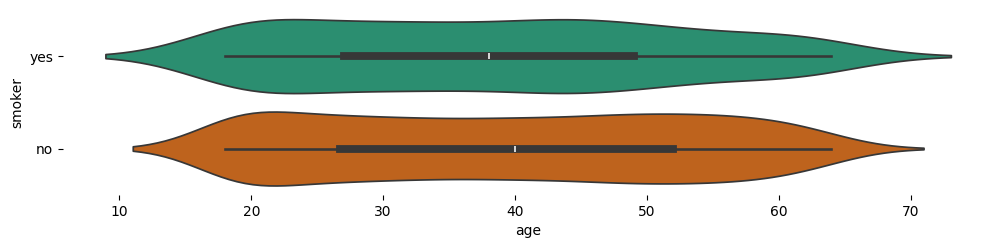

In [9]:
# @title smoker vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['smoker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='age', y='smoker', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-8-883d6d378c5f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='age', y='region', inner='box', palette='Dark2')


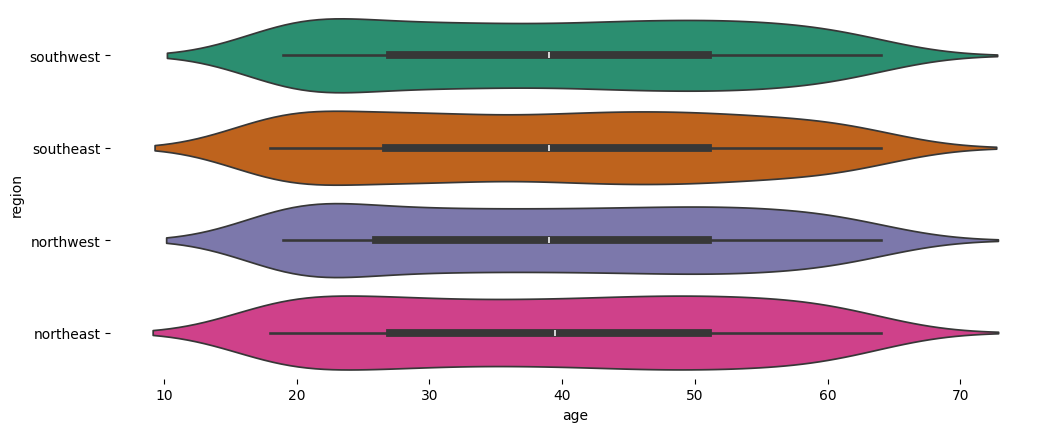

In [8]:
# @title region vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='age', y='region', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-7-160c67753336>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='bmi', y='sex', inner='box', palette='Dark2')


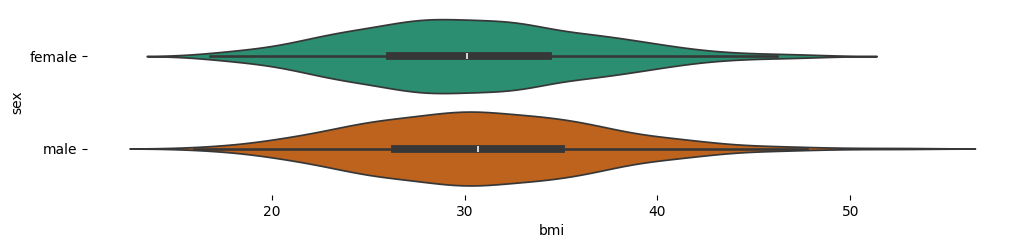

In [7]:
# @title sex vs bmi

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='bmi', y='sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)